In [19]:
import numpy as np
import pandas as pd
#from quetzal.model import stepmodel
import matplotlib.pyplot as plt

# Validation dashboard for estimation results

Compare different estimation models and their results

In [2]:
input_path = '../input/'
output_path = '../output/'
model_path = '../model/'

In [51]:
# Knot combinations that have been estimated
knot_combos = [(10,20), (20,40), (30,60), (40,80), (50,100), (60,120), (80,160), (90,180), (100,200), ('Esti','mated')]

In [52]:
# Load estimation results
results = pd.DataFrame()
for kc in knot_combos:
    excel = pd.read_excel(input_path + 'estimation_results_splineGC_distVoT_knots{}{}.xlsx'.format(kc[0], kc[1]),
                          sheet_name=None, index_col=0)
    for name, df in excel.items():
        results[(name, kc)] = df['Value']
results.columns = pd.MultiIndex.from_tuples(results.columns, names=['model', 'knots'])

In [53]:
results.T.head(3)

,,asc_air,asc_bus,asc_coach,asc_non_motor,asc_rail,b_ac,b_gc,Number of estimated parameters,Sample size,Excluded observations,Init log likelihood,Final log likelihood,Likelihood ratio test for the init. model,Rho-square for the init. model,Rho-square-bar for the init. model,Akaike Information Criterion,Bayesian Information Criterion,Final gradient norm,Nbr of threads
model,knots,,,,,,,,,,,,,,,,,,,
MNL,"(10, 20)",-4.797235,-2.830136,-4.810542,-3.267555,-2.422174,0.550011,-0.190906,7.0,36255.0,59175.0,-70420.873239,-15536.676054,109768.394370,0.779374,0.779275,31087.352108,31146.840436,0.104855,8.0
NL,"(10, 20)",-5.195710,-2.767684,-3.517144,-3.273511,-2.872542,0.671405,-0.057016,8.0,36255.0,59175.0,-70420.873239,-11995.810728,116850.125021,0.829655,0.829542,24007.621457,24075.608118,0.185705,8.0
NL_Fz1,"(10, 20)",-11.847928,-2.517457,-5.855223,-4.755272,-2.318658,0.940312,-0.534267,8.0,24760.0,70670.0,-48083.157910,-10064.266721,76037.782378,0.790690,0.790524,20144.533443,20209.469321,0.089715,8.0


C:\Users\marlin.arnz\AppData\Local\Continuum\miniconda3\envs\quetzal\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


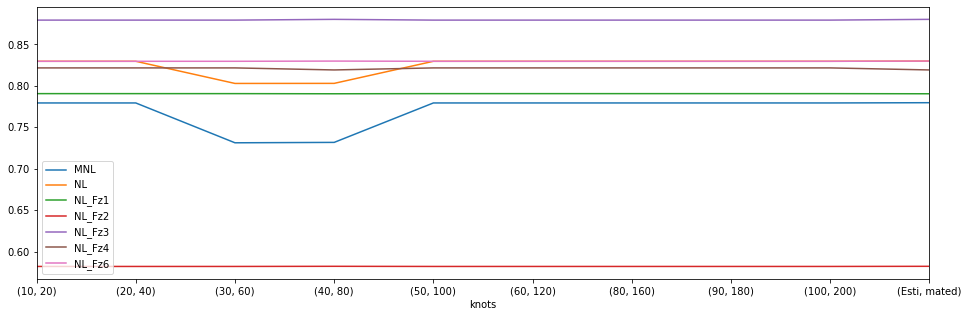

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
for i, m in zip(range(7), results.columns.unique(level=0)):
    results.T.loc[m, 'Rho-square-bar for the init. model'].plot(label=m, legend=True, ax=ax)
#results.T.reset_index().groupby('model').plot(x='knots', y='Final log likelihood',
#    legend=True, subplots=True, layout=(1,7), figsize=(16,5), rot=90)